# **Perceptrón Multicapa aplicado a conjunto datos del grupo**



## **Introducción**

- **Autor/es:** Rafael Cala González , David Valverde Gómez, Adrián Epifanio Rodríguez Hernández, Christian Torres González.

- **Descripción:** El conjunto de datos seleccionado contiene apartamentos a alquilar en la ciudad de Nueva York, con diversos datos sobre el distrito y barrio en que se encuentran, su precio o el tipo de habitación.

- **Objetivo:** Configurar el perceptrón para determinar el tipo de habitación a alquilar en función del distrito y barrio en que queramos alojarnos y el precio que estemos dispuestos a gastar.

- **Nota:** Nuestro conjunto de datos original contenía datos no numéricos, por lo que hemos tenido que sustituir los valores de las etiquetas correspondientes al barrio, vecindario y tipo de habitación por distintos valores numéricos (1, 2, 3...) .



## **Carga de librerías**



En primer lugar, cargamos las librerías a utilizar:

- **Numpy:** Para trabajar con vectores y matrices en Python
- **Matplotlib:** Para poder visualizar gráficos
- **Sklearn:** Para emplear algoritmos de clasificación, regresión...

In [0]:

import numpy as np

# Librería de comandos para poder trabajar como MATLAB
import matplotlib.pyplot as plt

# Librería que cuenta con algoritmos de clasificación, regresión... 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from datetime import datetime


## **Carga y visualización de datos** 

Se procede a cargar en memoria nuestro conjuntos de datos:

In [0]:
data = np.loadtxt("data.csv", dtype=int, delimiter=',')
(n_samples, n_features) = data.shape


Se trata de 4 columnas:
- Distrito
- Barrio
- Precio
- Tipo de habitación

Existen más de 5000 entradas en la tabla (el conjunto original tiene más de 48.000 pero hemos tenido que reducirlas para que el tiempo de cómputo no sea excesivo).


## **Preprocesado de datos**



Nuestras entradas serán:
- Distrito
- Barrio
- Precio

Y como salida se quiere predecir el tipo de habitación a alquilar (cuyos valores oscilarán entre 1 y 3).

Se realiza una partición de los datos, reservando el 75% de los datos del primer conjunto para entrenamiento, el otro 25% para validación.

In [0]:
train_size = 0.75
test_size = 1 - train_size

patterns_input = data[:, :-1] #Obtenemos todas las columnas excepto la última
patterns_target = data[:, -1] #Obtenemos la última columna que contiene el tipo de habitación a alquilar

input_train, input_valid, target_train, target_valid = train_test_split(patterns_input, patterns_target, train_size=train_size, test_size=test_size, random_state=0, shuffle=True)
input_test, input_valid, target_test, target_valid = train_test_split(input_valid, target_valid, train_size=train_size,test_size=test_size, random_state=0, shuffle=True)


## **Resultados iniciales del Perceptón Simple**

Se entrena el Perceptrón Simple con 200 iteraciones, de manera que el error de pérdidas desciende y, aparentemente, no descenderá más.

In [0]:
max_iter = 200
print("Learning a Perceptron with %d maximum number of iterations and ..." % 
max_iter)

per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)
print("Printing Perceptron results")
predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))


Learning a Perceptron with 200 maximum number of iterations and ...
-- Epoch 1
Norm: 633.51, NNZs: 3, Bias: 424.000000, T: 3861, Avg. loss: 16284.339549
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1171.61, NNZs: 3, Bias: 835.000000, T: 7722, Avg. loss: 16195.804455
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1626.94, NNZs: 3, Bias: 1209.000000, T: 11583, Avg. loss: 15682.480186
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2030.82, NNZs: 3, Bias: 1548.000000, T: 15444, Avg. loss: 15893.184408
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2425.12, NNZs: 3, Bias: 1886.000000, T: 19305, Avg. loss: 15347.087024
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2779.70, NNZs: 3, Bias: 2213.000000, T: 23166, Avg. loss: 15452.574981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3085.43, NNZs: 3, Bias: 2510.000000, T: 27027, Avg. loss: 15344.006216
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 3332.13, NNZs: 3, Bias: 2781.000000, T: 30888, Avg. loss: 1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Norm: 3794.49, NNZs: 3, Bias: -16810.000000, T: 613899, Avg. loss: 14030.504274
Total training time: 0.09 seconds.
-- Epoch 160
Norm: 3776.33, NNZs: 3, Bias: -16855.000000, T: 617760, Avg. loss: 14019.178969
Total training time: 0.09 seconds.
-- Epoch 161
Norm: 3775.73, NNZs: 3, Bias: -16906.000000, T: 621621, Avg. loss: 14104.005439
Total training time: 0.09 seconds.
-- Epoch 162
Norm: 3778.32, NNZs: 3, Bias: -16957.000000, T: 625482, Avg. loss: 14064.390572
Total training time: 0.09 seconds.
-- Epoch 163
Norm: 3781.91, NNZs: 3, Bias: -17013.000000, T: 629343, Avg. loss: 14102.054390
Total training time: 0.09 seconds.
-- Epoch 164
Norm: 3794.13, NNZs: 3, Bias: -17066.000000, T: 633204, Avg. loss: 14104.562290
Total training time: 0.09 seconds.
-- Epoch 165
Norm: 3775.73, NNZs: 3, Bias: -17127.000000, T: 637065, Avg. loss: 14150.897436
Total training time: 0.09 seconds.
-- Epoch 166
Norm: 3755.93, NNZs: 3, Bias: -17155.000000, T: 640926, Avg. loss: 13981.128982
Total training time: 0.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


Los resultados iniciales del Perceptrón Simple son:

- Train accuracy: 77.622%

- Valid accuracy: 75.776%

Se observa que el problema no es linealmente separable. Y aunque los resultados no son del todo buenos, para nuestro problema en cuestión se consideran aceptables.

## **Resultados iniciales del Perceptrón Multicapa**
 

Se define la función *MLP_train_valid* que realizará entrenamientos con el Perceptrón Multicapa (MLP), incluyendo validaciones en el conjunto de validación y *early stopping*, lo que significa que el entrenamiento se detendrá en caso de detectar que el modelo no mejora. 

In [0]:
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose): 
	classes = np.unique(target_train)
	loss_valid = []
	for i in range(max_iter//valid_cycles):
		for j in range(valid_cycles):
			out = mlp.partial_fit(input_train, target_train, classes)
			# Calculate loss function of valid set ... 
		last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
		loss_valid.append(last_lost_valid)
		if verbose:
				print("Iteration %d, train loss = %.8f, valid loss = %.8f" % (mlp.n_iter_, mlp.loss_, last_lost_valid))
		if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
				if verbose:
						print("Early stopping: Validation score did not improve")
				break
		if verbose: 
				print(out)
		if verbose:
				# Visualizing the Cost Function Trajectory
			print("Visualizing the Cost Function Trajectory")
			plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')                                                                   
			plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
			plt.xlabel('number of iterations')
			plt.ylabel('loss function')
			plt.legend(loc='upper right')
			plt.show()

Se realiza un entrenamiento con un MLP de una capa oculta de 10 neuronas, un ratio de aprendizaje de 0,001, durante un máximo de 500 iteraciones, validando cada 5 ciclos:

Learning a MLP with 10 hidden neurons, 500 maximum number of iterations and 0.00100000 learning rate ...
Iteration 5, train loss = 8.74275640, valid loss = 14.31906328
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


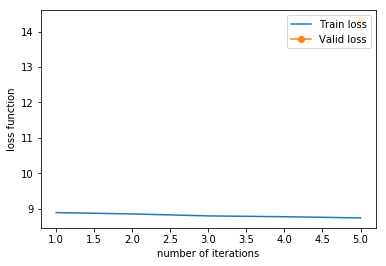

Iteration 10, train loss = 1.47946908, valid loss = 1.25792102
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


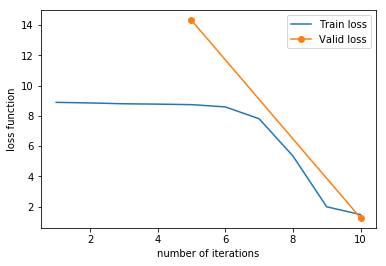

Iteration 15, train loss = 1.00928680, valid loss = 0.92893702
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


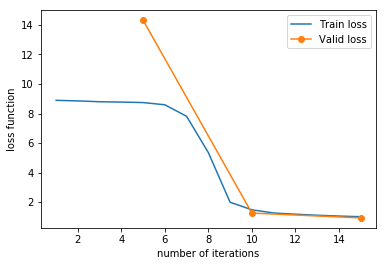

Iteration 20, train loss = 0.83225509, valid loss = 0.76975770
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


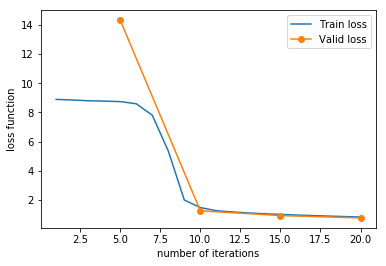

Iteration 25, train loss = 0.71651492, valid loss = 0.65829908
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


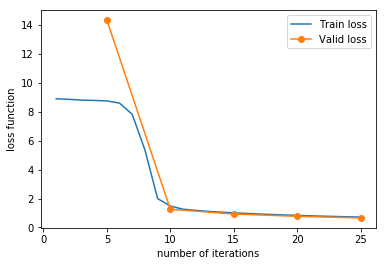

Iteration 30, train loss = 0.64675644, valid loss = 0.59178963
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


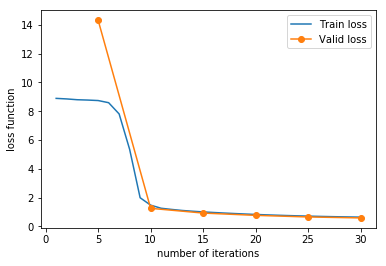

Iteration 35, train loss = 0.61265981, valid loss = 0.56116388
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


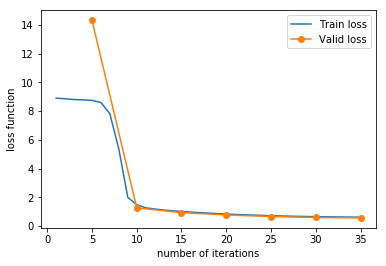

Iteration 40, train loss = 0.59654997, valid loss = 0.54950886
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


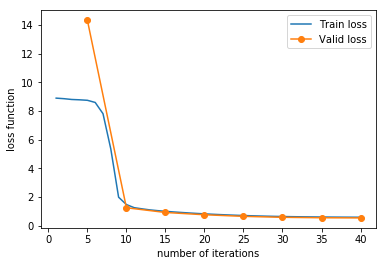

Iteration 45, train loss = 0.58817952, valid loss = 0.54416974
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


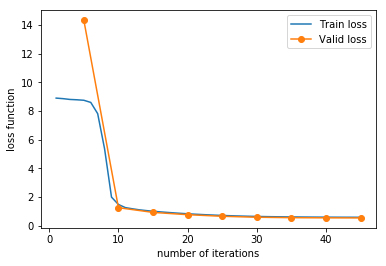

Iteration 50, train loss = 0.58296519, valid loss = 0.54114997
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


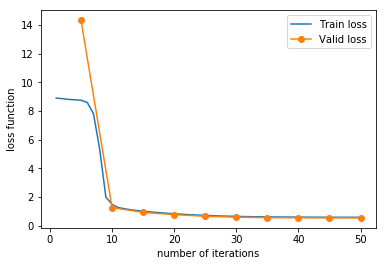

Iteration 55, train loss = 0.57894512, valid loss = 0.53897679
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


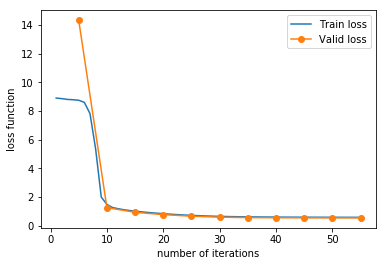

Iteration 60, train loss = 0.57558215, valid loss = 0.53669635
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


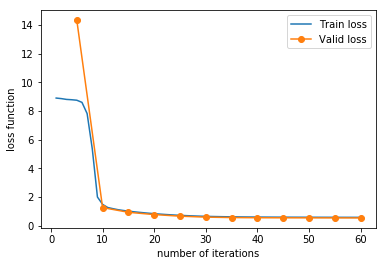

Iteration 65, train loss = 0.57265778, valid loss = 0.53351741
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


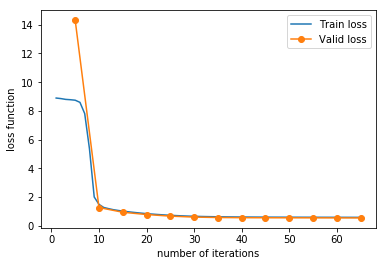

Iteration 70, train loss = 0.57018854, valid loss = 0.53017693
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


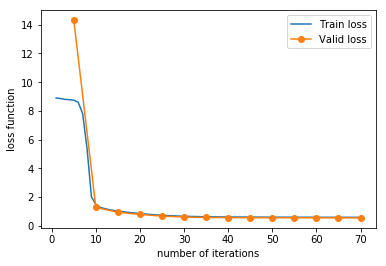

Iteration 75, train loss = 0.56830694, valid loss = 0.52700252
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


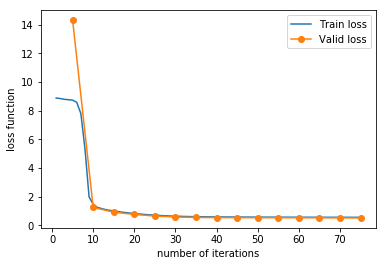

Iteration 80, train loss = 0.56639015, valid loss = 0.52323964
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


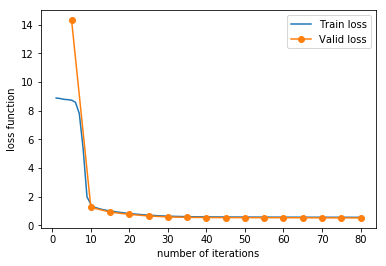

Iteration 85, train loss = 0.56373462, valid loss = 0.51845315
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


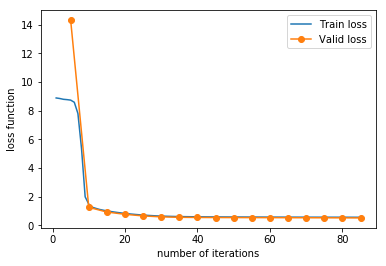

Iteration 90, train loss = 0.56182772, valid loss = 0.51703152
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


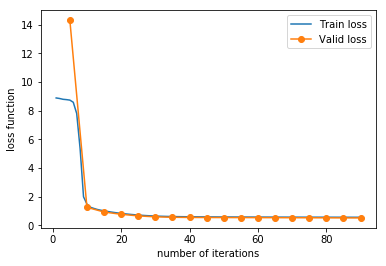

Iteration 95, train loss = 0.55989413, valid loss = 0.51610646
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


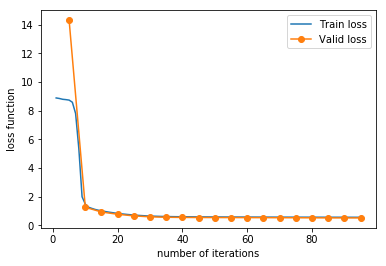

Iteration 100, train loss = 0.55825121, valid loss = 0.51566581
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


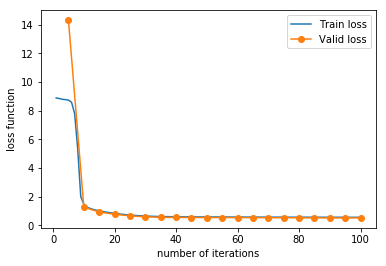

Iteration 105, train loss = 0.55693729, valid loss = 0.51501226
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


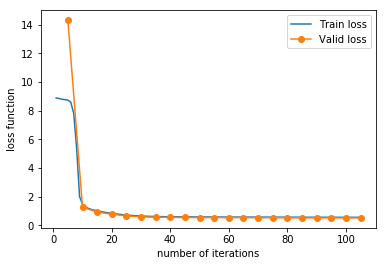

Iteration 110, train loss = 0.55560356, valid loss = 0.51412452
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


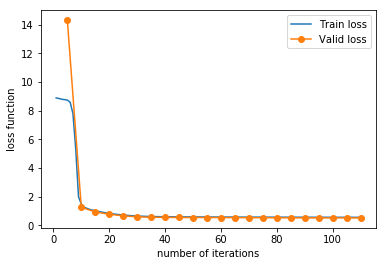

Iteration 115, train loss = 0.55439016, valid loss = 0.51325944
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


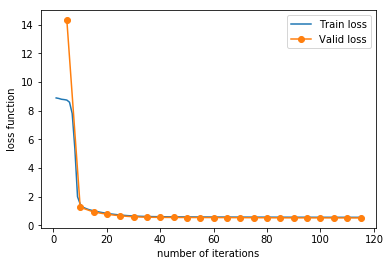

Iteration 120, train loss = 0.55316851, valid loss = 0.51234706
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


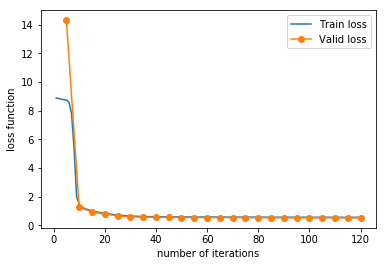

Iteration 125, train loss = 0.55159144, valid loss = 0.51062773
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


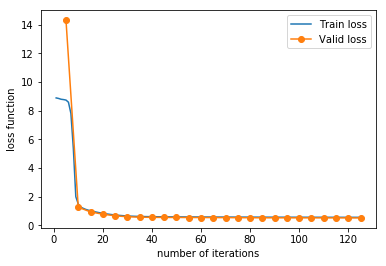

Iteration 130, train loss = 0.55025427, valid loss = 0.50966303
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


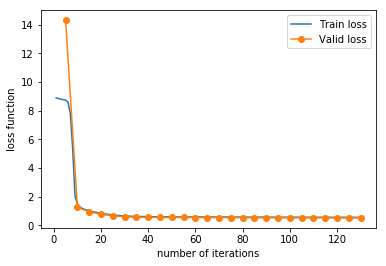

Iteration 135, train loss = 0.54884599, valid loss = 0.50851949
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


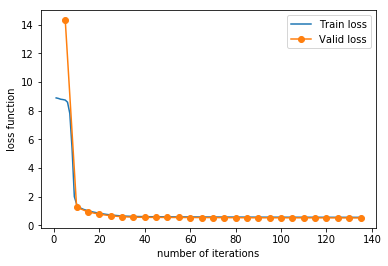

Iteration 140, train loss = 0.54759123, valid loss = 0.50781181
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


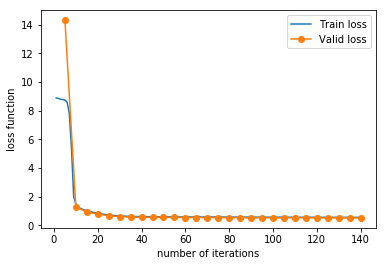

Iteration 145, train loss = 0.54627494, valid loss = 0.50701617
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


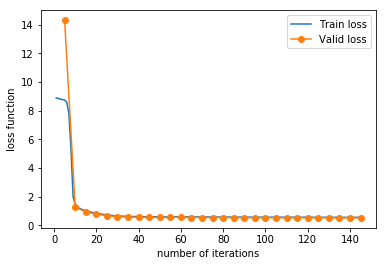

Iteration 150, train loss = 0.54504769, valid loss = 0.50628292
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


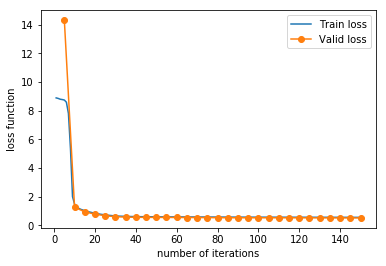

Iteration 155, train loss = 0.54388399, valid loss = 0.50570774
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


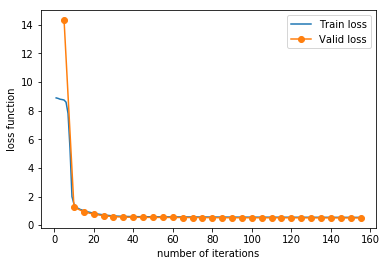

Iteration 160, train loss = 0.54245385, valid loss = 0.50487883
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


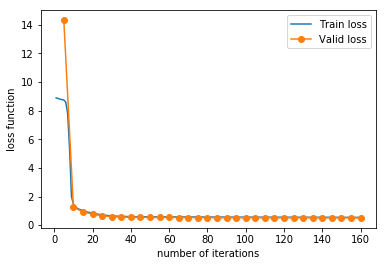

Iteration 165, train loss = 0.54101753, valid loss = 0.50417809
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


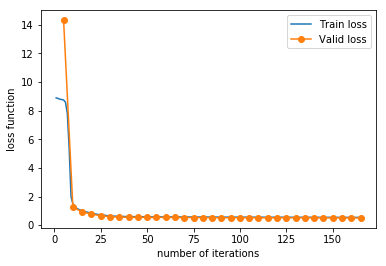

Iteration 170, train loss = 0.53963503, valid loss = 0.50358145
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


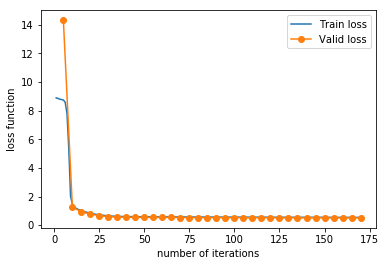

Iteration 175, train loss = 0.53831858, valid loss = 0.50297168
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


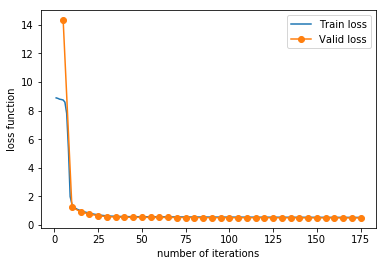

Iteration 180, train loss = 0.53672656, valid loss = 0.50234835
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


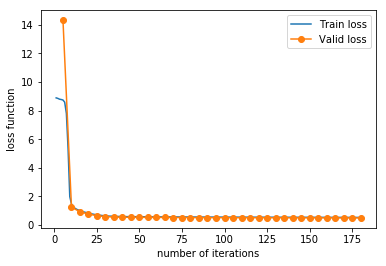

Iteration 185, train loss = 0.53493520, valid loss = 0.50151151
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


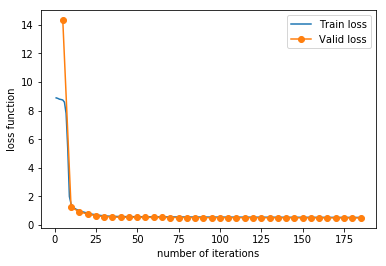

Iteration 190, train loss = 0.53330571, valid loss = 0.50109274
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


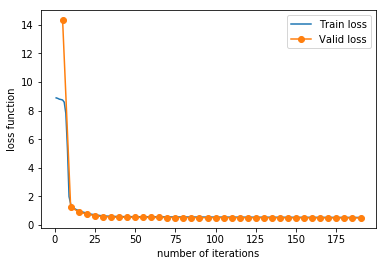

Iteration 195, train loss = 0.53171916, valid loss = 0.50066600
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


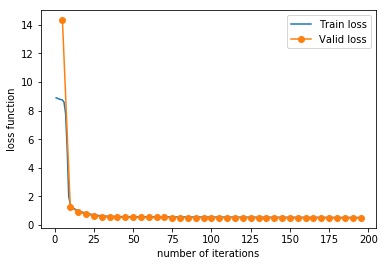

Iteration 200, train loss = 0.53020825, valid loss = 0.50034106
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


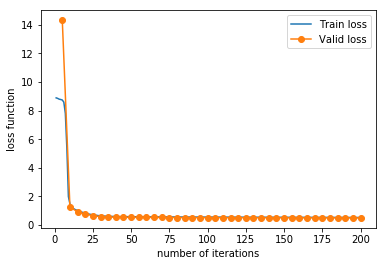

Iteration 205, train loss = 0.52877568, valid loss = 0.49997826
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


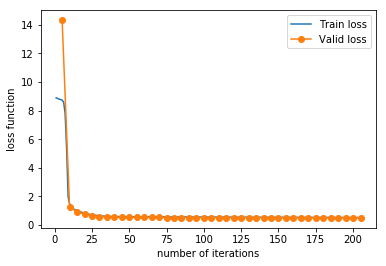

Iteration 210, train loss = 0.52745997, valid loss = 0.49950090
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


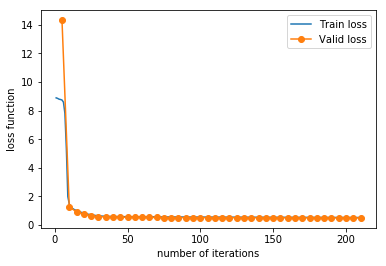

Iteration 215, train loss = 0.52619346, valid loss = 0.49912247
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


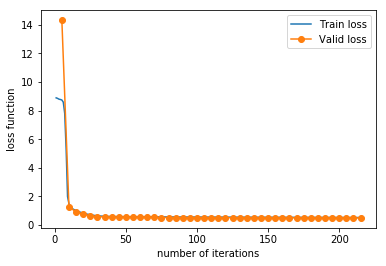

Iteration 220, train loss = 0.52496737, valid loss = 0.49863330
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


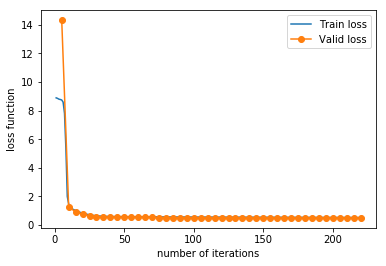

Iteration 225, train loss = 0.52379411, valid loss = 0.49787034
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


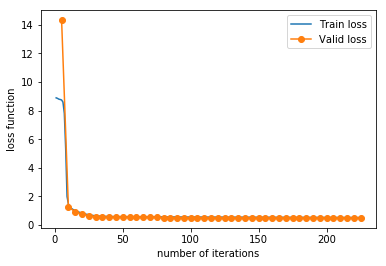

Iteration 230, train loss = 0.52268322, valid loss = 0.49759466
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


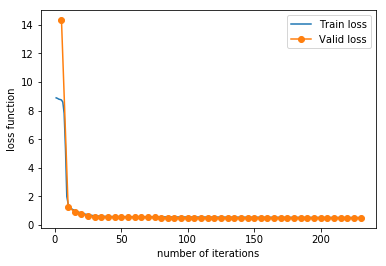

Iteration 235, train loss = 0.52160711, valid loss = 0.49707846
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


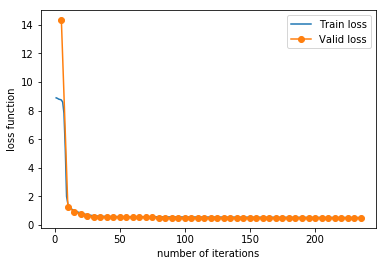

Iteration 240, train loss = 0.52057904, valid loss = 0.49692678
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


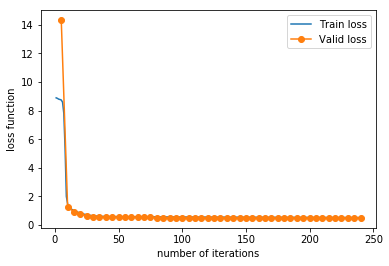

Iteration 245, train loss = 0.51952693, valid loss = 0.49663365
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


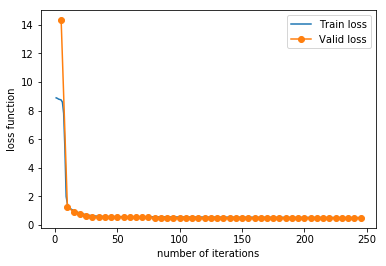

Iteration 250, train loss = 0.51826682, valid loss = 0.49625121
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


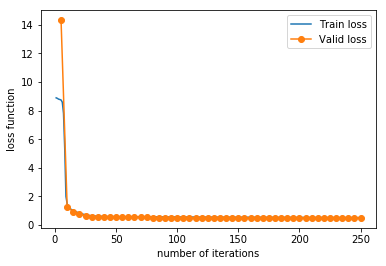

Iteration 255, train loss = 0.51709100, valid loss = 0.49587773
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


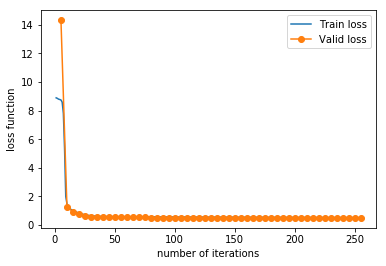

Iteration 260, train loss = 0.51659482, valid loss = 0.49560570
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


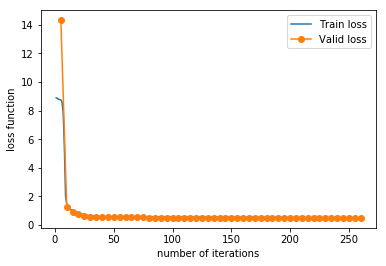

Iteration 265, train loss = 0.51638309, valid loss = 0.49526784
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


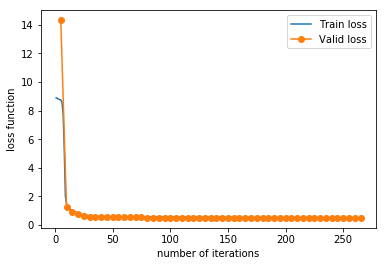

Iteration 270, train loss = 0.51614113, valid loss = 0.49502964
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


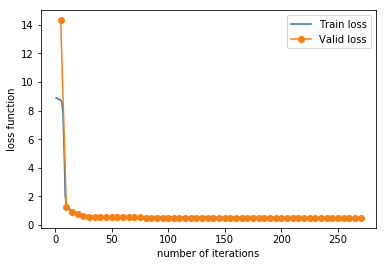

Iteration 275, train loss = 0.51577166, valid loss = 0.49478967
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


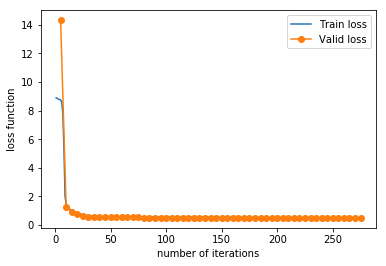

Iteration 280, train loss = 0.51558448, valid loss = 0.49463070
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


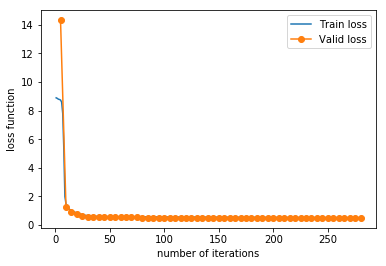

Iteration 285, train loss = 0.51523537, valid loss = 0.49446142
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


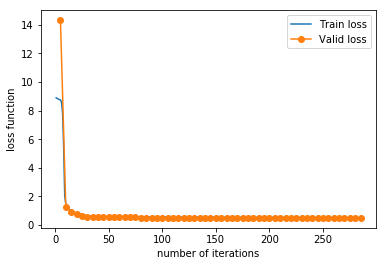

Iteration 290, train loss = 0.51617601, valid loss = 0.49468486
Early stopping: Validation score did not improve


In [0]:
n_hidden = 10
max_iter = 500
learning_rate_init = 0.001
valid_cycles = 5
early_stopping = True

print("Learning a MLP with %d hidden neurons, %d maximum number of iterations and %.8f learning rate ..." % (n_hidden, max_iter, learning_rate_init)) 
mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)


Se observa que el programa se detiene tras 290 iteraciones, ya que el *early stopping* detecta que los errores se estabilizan alrededor de 0.5, por lo que no se produce sobreentrenamiento.

A continuación se muestran los resultados iniciales de este entrenamiento:

In [0]:
print("Printing intial results")

predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))

print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Printing intial results
Train accuracy: 80.135%
Valid accuracy: 80.435%
Train confusion matrix:
[[1066  387    0]
 [ 332 2028    0]
 [  35   13    0]]
Valid confusion matrix:
[[110  31   0]
 [ 29 149   0]
 [  3   0   0]]
Train classification report:
              precision    recall  f1-score   support

           1       0.74      0.73      0.74      1453
           2       0.84      0.86      0.85      2360
           3       0.00      0.00      0.00        48

   micro avg       0.80      0.80      0.80      3861
   macro avg       0.53      0.53      0.53      3861
weighted avg       0.79      0.80      0.80      3861

Valid classification report:
              precision    recall  f1-score   support

           1       0.77      0.78      0.78       141
           2       0.83      0.84      0.83       178
           3       0.00      0.00      0.00         3

   micro avg       0.80      0.80      0.80       322
   macro avg       0.53      0.54      0.54       322
weighted avg  

Se observa que, curiosamente, la precisión es ligeramente mejor sobre el conjunto de validación (un 0.3%). Además, se ve una mejora sobre el Perceptrón Simple en un 2.513% para el conjunto de entrenamiento y un 4.659% sobre el conjunto de validación.
 

## **Optimización del ratio de aprendizaje**

Para acelerar la convergencia de los MLP se busca un ratio de aprendizaje más adecuado, probando con distintos valores entre 0,001 y 0,1, utilizando la función de activación *logistic* para intentar obtener bajadas más estables, a costa de sacrificar el tiempo de ejecución.

Learning rate optimization
Number of seconds for training: 3
Visualizing the Cost Function Trajectory with different learning rates


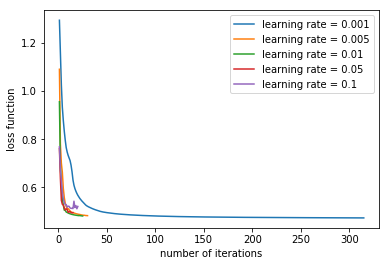

In [0]:
print("Learning rate optimization")

tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'logistic'
random_state = 0
now = datetime.now()

#now = datetime.now() 
loss_curves = []
for lr in tests_learning_rate_init:
  mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation) 
  MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
  loss_curves.append(mlp.loss_curve_)

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())

print("Visualizing the Cost Function Trajectory with different learning rates")
for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
    plt.plot(range(1, len(loss_curve)+1), loss_curve, label='learning rate = ' + str(lr))

plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()


Se observa que el ratio de aprendizaje más estable es 0.01, ya que en unas 25 iteraciones ha conseguido reducir la variación de error al mínimo, a diferencia de 0.005, que no ajusta tanto el error.

## **Optimización de la arquitectura**

Para tratar de mejorar los resultados de los MLP se busca el número de neuronas ocultas más adecuado, probando con distintos valores entre 5 y 200, repitiendo parar cada configuración 10 veces y quedándose con aquella de mayor precisión en el conjunto de validación. Se mantiene la función de activación *logistic*.

In [0]:
print("Architecture optimization")

tests_n_hidden = [5, 10, 25, 50, 75, 100, 125, 150, 175, 200]
n_reps = 10

activation = 'logistic'
learning_rate_init = 0.01

now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
    max_acc_train = max_acc_valid = 0.0
    for random_state in range(n_reps):
        mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
        MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
        
        acc_train = accuracy_score(target_train, mlp.predict(input_train))
        acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
        print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
        if (max_acc_valid < acc_valid):
            max_acc_valid = acc_valid
            max_acc_train = acc_train
            if (acc_valid > best_acc):
                best_acc = acc_valid
                best_mlp = mlp
    accs_train.append(max_acc_train)
    accs_valid.append(max_acc_valid)
    print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))

print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)



Architecture optimization
Seed = 0, train acc = 0.79746180, valid acc = 0.81055901, iterations = 35
Seed = 1, train acc = 0.79927480, valid acc = 0.80434783, iterations = 25
Seed = 2, train acc = 0.80315980, valid acc = 0.80745342, iterations = 25
Seed = 3, train acc = 0.80290080, valid acc = 0.80434783, iterations = 35
Seed = 4, train acc = 0.80315980, valid acc = 0.80124224, iterations = 85
Seed = 5, train acc = 0.80808081, valid acc = 0.79813665, iterations = 35
Seed = 6, train acc = 0.81015281, valid acc = 0.81677019, iterations = 120
Seed = 7, train acc = 0.80471380, valid acc = 0.81055901, iterations = 50
Seed = 8, train acc = 0.80808081, valid acc = 0.81055901, iterations = 185
Seed = 9, train acc = 0.80497280, valid acc = 0.81366460, iterations = 50
Number hidden units = 5, train acc = 0.81015281, max valid acc = 0.81677019
Seed = 0, train acc = 0.80600881, valid acc = 0.80745342, iterations = 25
Seed = 1, train acc = 0.80704481, valid acc = 0.81366460, iterations = 30
Seed = 2

Se puede ver que el mejor MLP encontrado resulta ser aquel con 50 neuronas ocultas.

A continuación se mostrarán los resultados de errores obtenidos con las distintas arquitecturas.

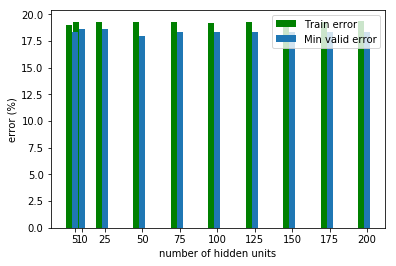

In [0]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

No se distingue mucha variación en el error con los distintos números de neuronas en la capa oculta. Esto puede ser debido a nuestro conjunto de datos, ya que al existir un error de aproximadamente un 20%, la gráfica no es representativa de dichas diferecias entre arquitecturas. 

## **Resultados finales mejor MLP**

Se calculan los resultados finales para el mejor MLP obtenido, incluyendo el conjunto de test.

In [0]:
print("Printing final results")

predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)

print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Printing final results
Train accuracy: 80.756%
Valid accuracy: 81.988%
Test accuracy: 82.402%
Train confusion matrix:
[[1011  442    0]
 [ 253 2107    0]
 [  32   16    0]]
Valid confusion matrix:
[[105  36   0]
 [ 19 159   0]
 [  3   0   0]]
Test confusion matrix:
[[260  93   0]
 [ 60 536   0]
 [ 13   4   0]]
Train classification report:
              precision    recall  f1-score   support

           1       0.78      0.70      0.74      1453
           2       0.82      0.89      0.86      2360
           3       0.00      0.00      0.00        48

   micro avg       0.81      0.81      0.81      3861
   macro avg       0.53      0.53      0.53      3861
weighted avg       0.80      0.81      0.80      3861

Valid classification report:
              precision    recall  f1-score   support

           1       0.83      0.74      0.78       141
           2       0.82      0.89      0.85       178
           3       0.00      0.00      0.00         3

   micro avg       0.82      0.

Se observa que los resultados finales del mejor MLP obtenido mejoran respecto al Perceptrón Simple un 3.134% y un 6.222% para los conjuntos de entrenamiento y validación respectivamente, mejorando la generalización respecto al MLP inicial. El error final parar el conjunto de test es 82.402%, un 0.404% mejor que el conjunto de validación. Este es un caso bastante singular, probablemente producto del conjunto de datos elegido para este ejercicio.

En la matriz de confusión y el informe de clasificación del conjunto de test se aprecia que el tipo de apartamento con mayores problemas resulta ser el tipo 3, con una pésima precisión del 0%. Nos aventuramos a decir que esta nula precisión es causa de la desigual proporción de tipos de apartamentos en nuestro conjunto de datos, ya que probablemente haya tan pocos apartamentos de tipo 3 que no ha sido posible realizar un entrenamiento decente con dichos datos.

Finalmente se muestran las curvas ROC para el conjunto de test:

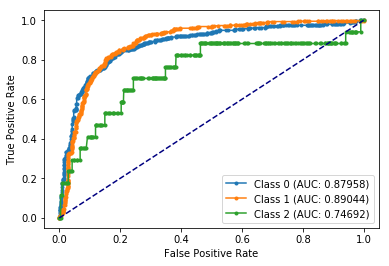

In [0]:
# ROC curves of test set
mlp_probs = mlp.predict_proba(input_test)
classes  = np.unique(target_train)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
   mlp_auc.append(roc_auc_score(target_test==cla, mlp_probs[:,cla - 1]))
   fpr, tpr, _ = roc_curve(target_test==cla, mlp_probs[:,cla - 1])
   mlp_fpr.append(fpr)
   mlp_tpr.append(tpr)

for cla in classes:
   # plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
   plt.plot(mlp_fpr[cla - 1], mlp_tpr[cla - 1], marker='.', label='Class %d (AUC: %.5f)' % (cla - 1, mlp_auc[cla - 1]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


En la gráfica también se puede ver lo comentado anteriormente, que la clase 3 (clase 2 en la gráfica) es con diferencia la peor predicha.

## **Conclusión**

El conjunto de datos elegido ha condicionado enormemente al análisis realizado. 

No obstante, sí se ha observado la mejoría de nuestro modelo a través de las distintas arquitecturas de Perceptrón probadas, variando el núúmero de neuronas ocultas y de ratio de aprendizaje.

Una vez más, comentar que el conjunto de datos propuesto ha significado la obtención de unas precisiones no del todo buenas, aunque relativamente aceptables, con la excepción del grupo de habitaciones de tipo 3, el cuál nos ceñimos a la hipótesis de que existen tan pocas entradas con este valor que el entrenamiento con el mismo ha sido, como mínimo, insuficiente, si no nulo.